In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import average_precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import pickle


In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\glori\anaconda3\lib\site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt



In [5]:
file_path = "Data/model_1_combine_data.csv"


In [6]:
my_data = pd.read_csv(file_path, error_bad_lines=False, low_memory=False)
my_data

,Unnamed: 0,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
0,421097,5000.0,669.0,21.80,OK,8,other,Accepted
1,421098,15000.0,704.0,18.29,FL,2,debt_consolidation,Accepted
2,421099,11200.0,669.0,43.97,NH,0,medical,Accepted
3,421100,25000.0,669.0,12.89,AL,10,debt_consolidation,Accepted
4,421101,3000.0,764.0,0.58,WA,9,major_purchase,Accepted
...,...,...,...,...,...,...,...,...
1081515,19698926,3000.0,535.0,1.54,CT,5,Medical expenses,Rejected
1081516,19698936,6000.0,580.0,5.55,TX,0,Car financing,Rejected
1081517,19698996,3000.0,561.0,0.00,OR,0,Debt consolidation,Rejected
1081518,19699052,2500.0,573.0,8.55,NY,0,Other,Rejected


In [7]:
my_data['Loan_Status'].value_counts()

Rejected    628344
Accepted    453176
Name: Loan_Status, dtype: int64

In [8]:
#Understanding the split the reject and accept applications
print (my_data['Loan_Status'].value_counts(normalize=True))



Rejected    0.580982
Accepted    0.419018
Name: Loan_Status, dtype: float64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

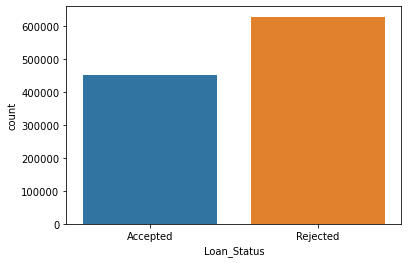

In [9]:
#predicting loan status creating countplot
sns.countplot(x='Loan_Status', data=my_data)

C:\Users\glori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

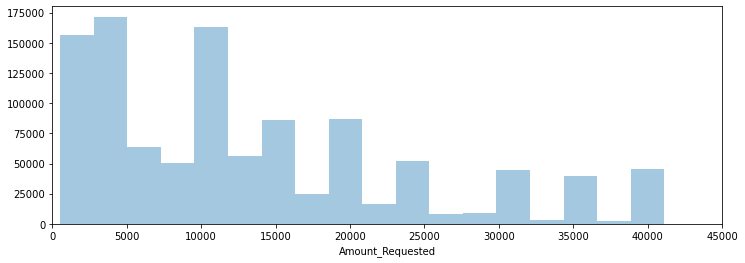

In [10]:
#histogram of the loan amount
plt.figure(figsize=(12,4))
sns.distplot(my_data['Amount_Requested'], kde=False, bins=40)
plt.xlim(0,45000)

In [11]:
#what is the correlation b/t the variables
my_data.corr()

,Unnamed: 0,Amount_Requested,Risk_Score,debt_to_income_ratio,Employment_Length
Unnamed: 0,1.000000,-0.236809,-0.561502,0.019285,-0.613899
Amount_Requested,-0.236809,1.000000,0.310587,0.002001,0.190206
Risk_Score,-0.561502,0.310587,1.000000,-0.002608,0.449296
debt_to_income_ratio,0.019285,0.002001,-0.002608,1.000000,-0.021967
Employment_Length,-0.613899,0.190206,0.449296,-0.021967,1.000000


(10.0, 0.0)

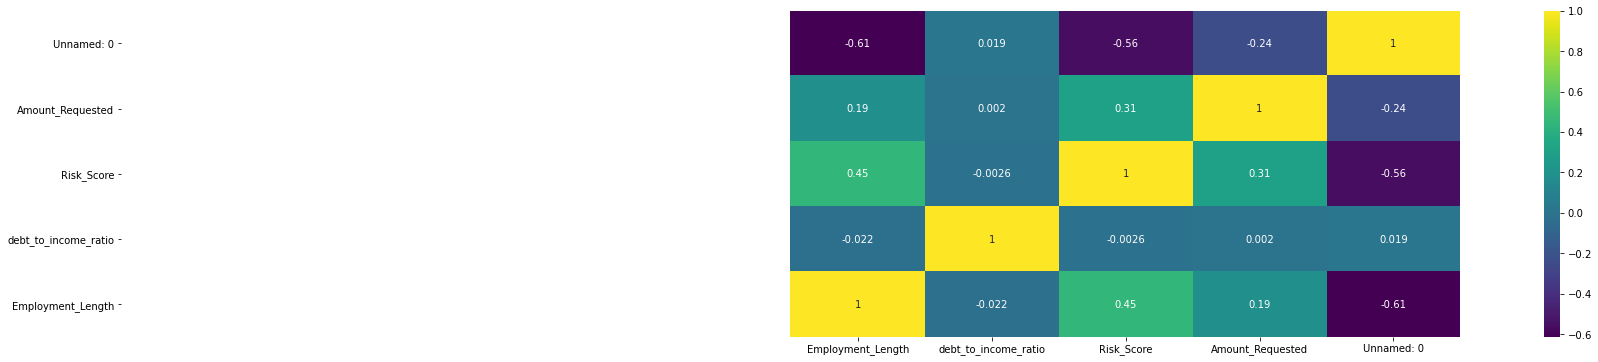

In [12]:
#correlation using heatmap
plt.figure(figsize=(30, 6))
sns.heatmap(my_data.corr(), annot=True, cmap='viridis')
plt.xlim(10,0)

<AxesSubplot:xlabel='Loan_Status', ylabel='Amount_Requested'>

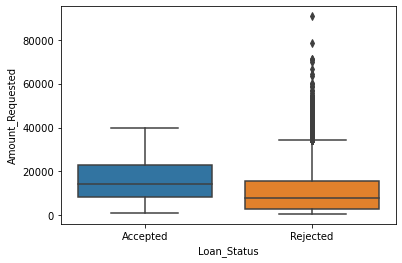

In [13]:
#boxplot showing relationship between the loan amount and loan status
sns.boxplot(x='Loan_Status', y='Amount_Requested', data=my_data)

In [14]:
#Loan Amount, grouped by Loan Status
my_data.groupby('Loan_Status')['Amount_Requested'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
Accepted,453176.0,16304.636995,10200.954582,1000.0,8500.0,14400.0,22825.0,40000.0
Rejected,628344.0,11385.468589,10647.183241,525.0,3000.0,8000.0,15500.0,90725.0


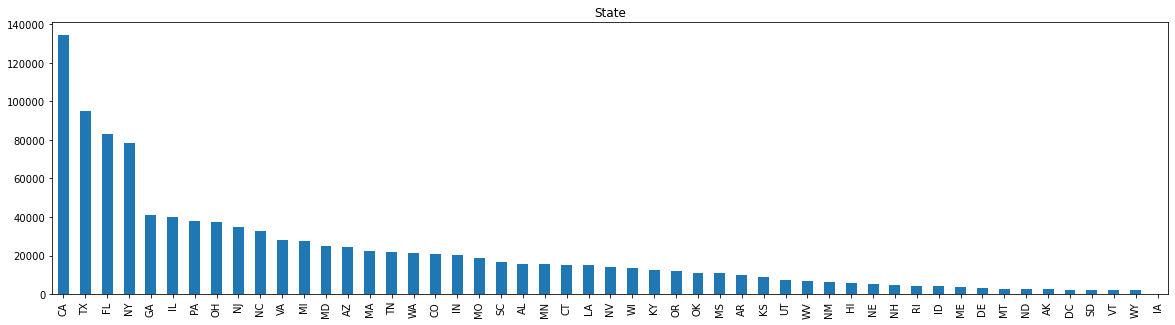

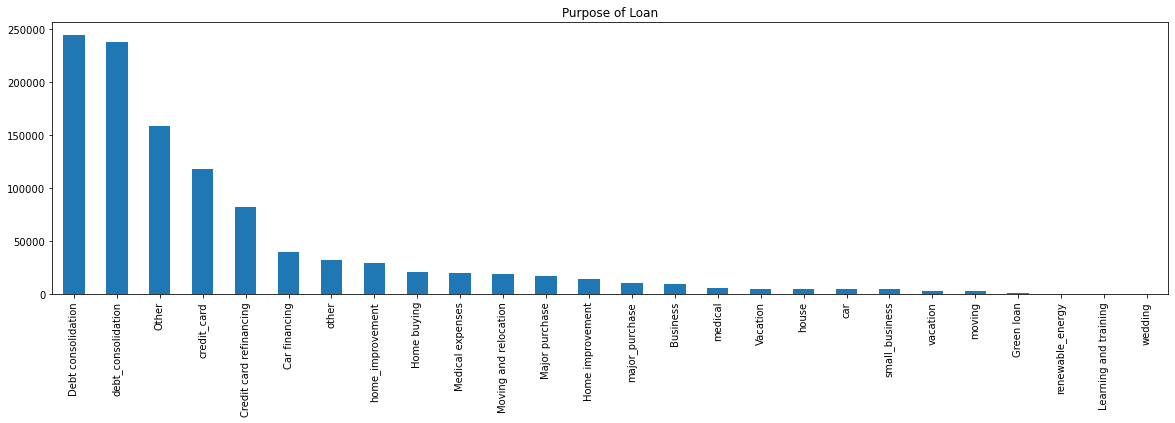

In [15]:
#split of all categorical columns
my_data['State'].value_counts().plot.bar(figsize=(20,5), title='State')
plt.show()
my_data['Purpose'].value_counts().plot.bar(figsize=(20,5), title='Purpose of Loan')
plt.show()

C:\Users\glori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


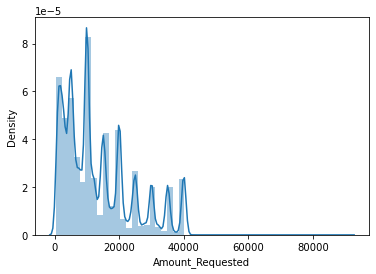

In [16]:
#split of Numeric columns
sns.distplot(my_data['Amount_Requested'])
plt.show()

C:\Users\glori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


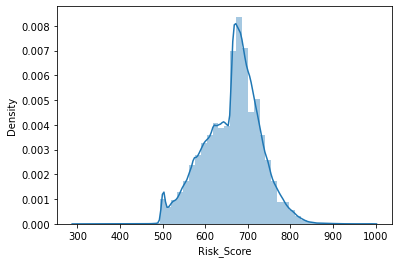

In [17]:
#split of numeric columns
sns.distplot(my_data['Risk_Score'])
plt.show()

C:\Users\glori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


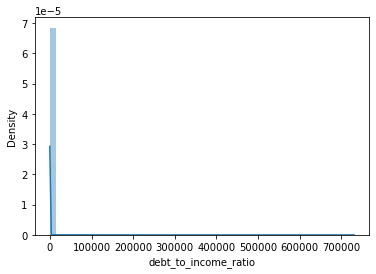

730426.5
---------------
0.0
---------------
         debt_to_income_ratio Loan_Status
1081519                   0.0    Rejected
72018                     0.0    Accepted
912669                    0.0    Rejected
912668                    0.0    Rejected
912667                    0.0    Rejected
...                       ...         ...
752158               167650.0    Rejected
922204               183650.0    Rejected
810079               192200.0    Rejected
811546               196100.0    Rejected
783878               730426.5    Rejected

[1081520 rows x 2 columns]


In [18]:
# understanding split of all Numeric Columns 
sns.distplot(my_data['debt_to_income_ratio'])
plt.show()

print(my_data['debt_to_income_ratio'].max())
print('---------------')
print(my_data['debt_to_income_ratio'].min())
print('---------------')
print(my_data[['debt_to_income_ratio','Loan_Status']].sort_values(by='debt_to_income_ratio'))

In [19]:
#define categorical and numerical features
categorical_features = ['State', 'Purpose', 'Loan_Status']

numerical_features = ['Amount_Requested', 'Risk_Score', 'debt_to_income_ratio', 'Employment_Length']

features = categorical_features + numerical_features

#define the features
print('Categorical Feature:\t', len(categorical_features))
print('Numerical Feature:\t', len(numerical_features))
print('Total Features:\t\t', len(features))

Categorical Feature:	 3
Numerical Feature:	 4
Total Features:		 7


In [20]:
my_data

,Unnamed: 0,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
0,421097,5000.0,669.0,21.80,OK,8,other,Accepted
1,421098,15000.0,704.0,18.29,FL,2,debt_consolidation,Accepted
2,421099,11200.0,669.0,43.97,NH,0,medical,Accepted
3,421100,25000.0,669.0,12.89,AL,10,debt_consolidation,Accepted
4,421101,3000.0,764.0,0.58,WA,9,major_purchase,Accepted
...,...,...,...,...,...,...,...,...
1081515,19698926,3000.0,535.0,1.54,CT,5,Medical expenses,Rejected
1081516,19698936,6000.0,580.0,5.55,TX,0,Car financing,Rejected
1081517,19698996,3000.0,561.0,0.00,OR,0,Debt consolidation,Rejected
1081518,19699052,2500.0,573.0,8.55,NY,0,Other,Rejected


In [21]:
loan_df=my_data.drop(['Unnamed: 0'], axis=1).fillna(-1)
loan_df

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
0,5000.0,669.0,21.80,OK,8,other,Accepted
1,15000.0,704.0,18.29,FL,2,debt_consolidation,Accepted
2,11200.0,669.0,43.97,NH,0,medical,Accepted
3,25000.0,669.0,12.89,AL,10,debt_consolidation,Accepted
4,3000.0,764.0,0.58,WA,9,major_purchase,Accepted
...,...,...,...,...,...,...,...
1081515,3000.0,535.0,1.54,CT,5,Medical expenses,Rejected
1081516,6000.0,580.0,5.55,TX,0,Car financing,Rejected
1081517,3000.0,561.0,0.00,OR,0,Debt consolidation,Rejected
1081518,2500.0,573.0,8.55,NY,0,Other,Rejected


In [22]:
# df[df.b > 10]
dti_values_over100 = loan_df[loan_df.debt_to_income_ratio > 100]

In [23]:
print(dti_values_over100.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22081 entries, 493 to 1081423
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_Requested      22081 non-null  float64
 1   Risk_Score            22081 non-null  float64
 2   debt_to_income_ratio  22081 non-null  float64
 3   State                 22081 non-null  object 
 4   Employment_Length     22081 non-null  int64  
 5   Purpose               22081 non-null  object 
 6   Loan_Status           22081 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.3+ MB
None


In [24]:
dti_values_over100.head()

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
493,28000.0,704.0,112.20,NV,0,debt_consolidation,Accepted
643,40000.0,709.0,101.46,OH,4,debt_consolidation,Accepted
1229,10000.0,714.0,114.27,TX,9,debt_consolidation,Accepted
1683,9000.0,684.0,106.66,IL,4,credit_card,Accepted
1879,35000.0,714.0,102.47,UT,0,debt_consolidation,Accepted


In [25]:
dti_values_over100["Loan_Status"].value_counts()

Rejected    21193
Accepted      888
Name: Loan_Status, dtype: int64

In [26]:
clean_dti_data=loan_df[loan_df.debt_to_income_ratio < 100]

In [27]:
clean_dti_data

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
0,5000.0,669.0,21.80,OK,8,other,Accepted
1,15000.0,704.0,18.29,FL,2,debt_consolidation,Accepted
2,11200.0,669.0,43.97,NH,0,medical,Accepted
3,25000.0,669.0,12.89,AL,10,debt_consolidation,Accepted
4,3000.0,764.0,0.58,WA,9,major_purchase,Accepted
...,...,...,...,...,...,...,...
1081515,3000.0,535.0,1.54,CT,5,Medical expenses,Rejected
1081516,6000.0,580.0,5.55,TX,0,Car financing,Rejected
1081517,3000.0,561.0,0.00,OR,0,Debt consolidation,Rejected
1081518,2500.0,573.0,8.55,NY,0,Other,Rejected


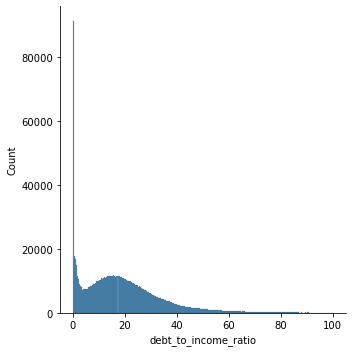

In [28]:
sns.displot(clean_dti_data["debt_to_income_ratio"])
plt.show()

In [29]:
#plotting the clean data
print(clean_dti_data["Loan_Status"].value_counts(normalize=True))

Rejected    0.562685
Accepted    0.437315
Name: Loan_Status, dtype: float64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

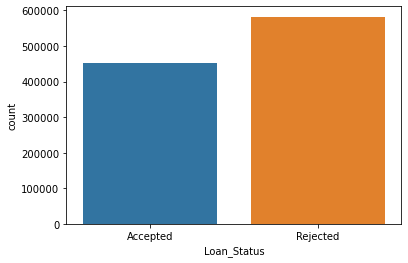

In [30]:
#Dependent Variable - Loan Status
sns.countplot(x='Loan_Status', data=clean_dti_data)

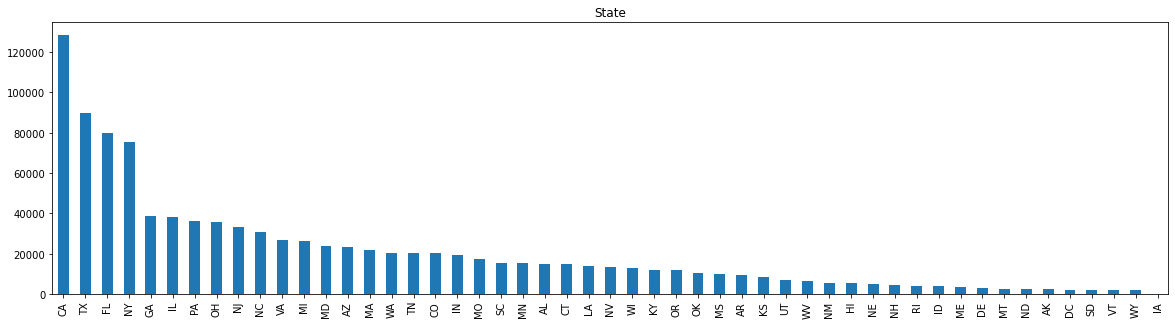

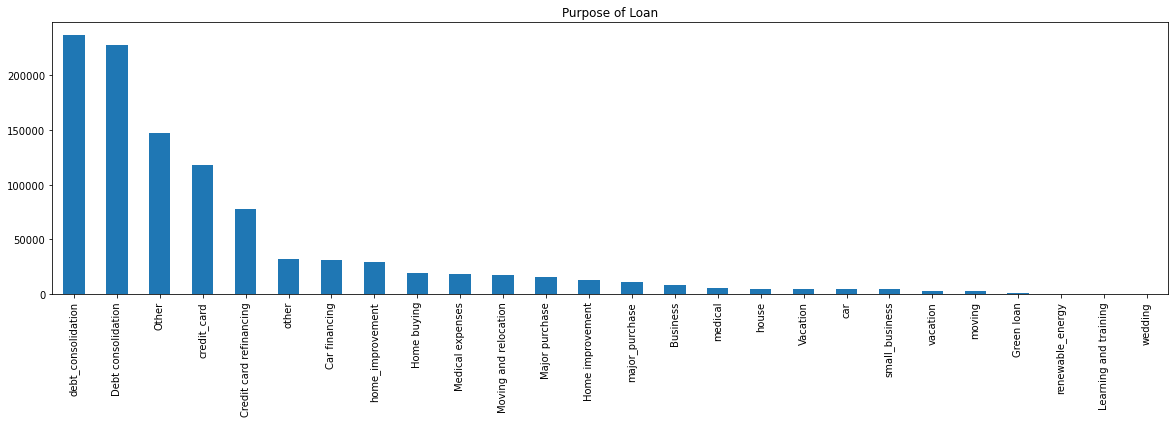

In [31]:
clean_dti_data['State'].value_counts().plot.bar(figsize=(20,5), title='State')
plt.show()
clean_dti_data['Purpose'].value_counts().plot.bar(figsize=(20,5), title='Purpose of Loan')
plt.show()

C:\Users\glori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


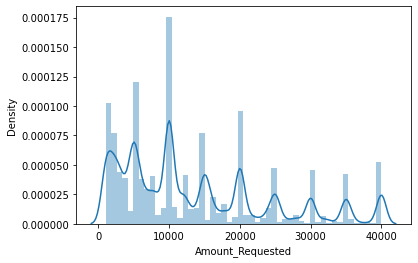

In [32]:
sns.distplot(clean_dti_data["Amount_Requested"])
plt.show()

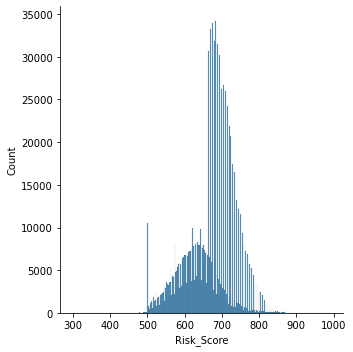

In [33]:
sns.displot(clean_dti_data["Risk_Score"])
plt.show()

In [34]:
#Loan purpose recategorized
clean_dti_data.loc[(clean_dti_data.Purpose == "debt_consolidation"), "Purpose"] = "Debt consolidation"
clean_dti_data.loc[(clean_dti_data.Purpose == "other"), "Purpose"] = "Other"
clean_dti_data.loc[(clean_dti_data.Purpose == "car"), "Purpose"] = "Car Financing"
clean_dti_data.loc[(clean_dti_data.Purpose == "home_improvement"), "Purpose"] = "Home Improvement"
clean_dti_data.loc[(clean_dti_data.Purpose == "moving"), "Purpose"] = "Relocation Expense"
clean_dti_data.loc[(clean_dti_data.Purpose == "major_purchase"), "Purpose"] = "Major Purchase"
clean_dti_data.loc[(clean_dti_data.Purpose == "medical"), "Purpose"] = "Medical Expense"
clean_dti_data.loc[(clean_dti_data.Purpose == "house"), "Purpose"] = "Home Buying"
clean_dti_data.loc[(clean_dti_data.Purpose == "vacation"), "Purpose"] = "Vacation"
clean_dti_data.loc[(clean_dti_data.Purpose == "small_business"), "Purpose"] = "Business"
clean_dti_data.loc[(clean_dti_data.Purpose == "renewable_energy"), "Purpose"] = "Energy Loan"

C:\Users\glori\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [35]:
#Cleaned Purpose Column
clean_dti_data["Purpose"].value_counts()

Debt consolidation         463923
Other                      179281
credit_card                118031
Credit card refinancing     77889
Car financing               31333
Home Improvement            29363
Home buying                 19056
Medical expenses            18315
Moving and relocation       17612
Major purchase              15669
Home improvement            13046
Business                    13010
Major Purchase              10754
Vacation                     7780
Medical Expense              5783
Home Buying                  4921
Car Financing                4546
Relocation Expense           2825
Green loan                    808
Energy Loan                   252
Learning and training          34
wedding                         5
Name: Purpose, dtype: int64

<AxesSubplot:>

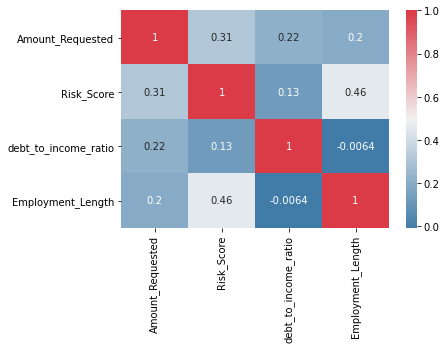

In [36]:
# plot the heatmap
corr = clean_dti_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [37]:
clean_dti_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034236 entries, 0 to 1081519
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Amount_Requested      1034236 non-null  float64
 1   Risk_Score            1034236 non-null  float64
 2   debt_to_income_ratio  1034236 non-null  float64
 3   State                 1034236 non-null  object 
 4   Employment_Length     1034236 non-null  int64  
 5   Purpose               1034236 non-null  object 
 6   Loan_Status           1034236 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 63.1+ MB


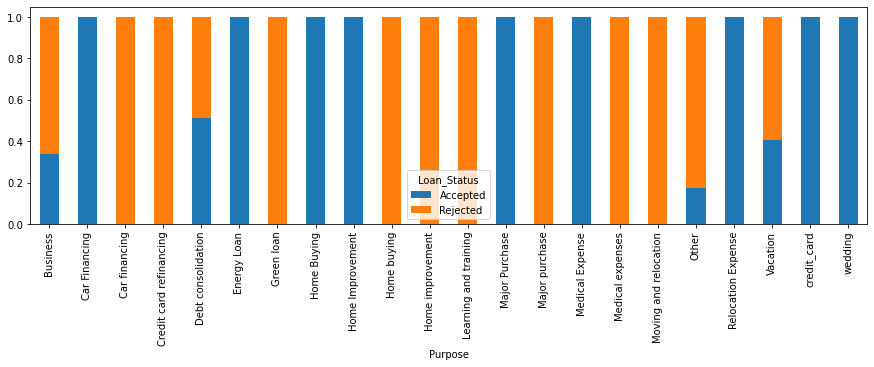

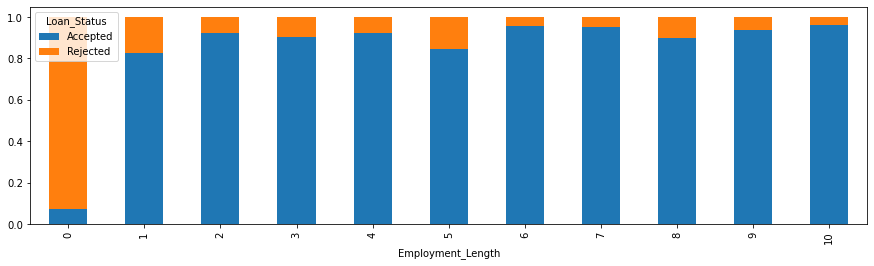

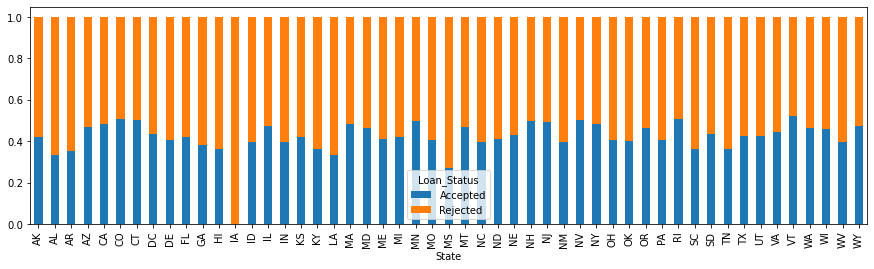

In [38]:
Loan_Purpose = pd.crosstab(clean_dti_data["Purpose"], clean_dti_data["Loan_Status"])
Employment_Length = pd.crosstab(clean_dti_data["Employment_Length"], clean_dti_data["Loan_Status"])
State = pd.crosstab(clean_dti_data["State"], clean_dti_data["Loan_Status"])

Loan_Purpose.div(Loan_Purpose.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(15,4))
plt.show()
Employment_Length.div(Employment_Length.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(15,4))
plt.show()
State.div(State.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(15,4))
plt.show()

<ipython-input-39-30b0929a1dde>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dti_data['Amount_Requested_bins']=pd.cut(clean_dti_data['Amount_Requested'],bins,labels=group)


Text(0, 0.5, 'Percentage')

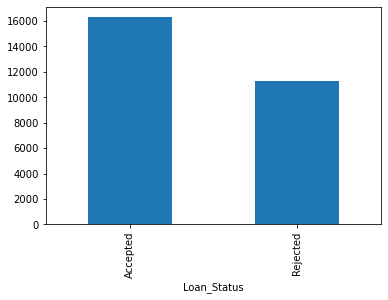

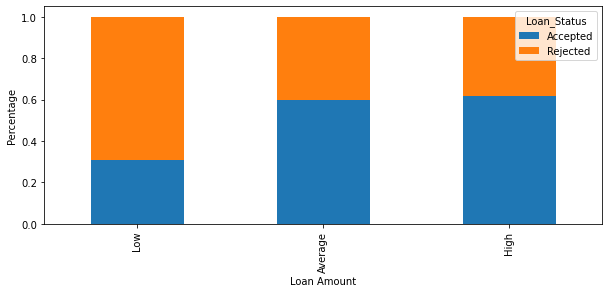

In [39]:
clean_dti_data.groupby("Loan_Status")["Amount_Requested"].mean().plot.bar()

bins=[0,10000,20000,30000]
group=['Low','Average','High']

clean_dti_data['Amount_Requested_bins']=pd.cut(clean_dti_data['Amount_Requested'],bins,labels=group)

Amount_Requested_bins=pd.crosstab(clean_dti_data['Amount_Requested_bins'],clean_dti_data['Loan_Status'])
Amount_Requested_bins.div(Amount_Requested_bins.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,4))
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

<ipython-input-40-efd6e5cc71f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dti_data['Risk_Score_bins']=pd.cut(clean_dti_data['Risk_Score'],bins,labels=group)


Text(0, 0.5, 'Percentage')

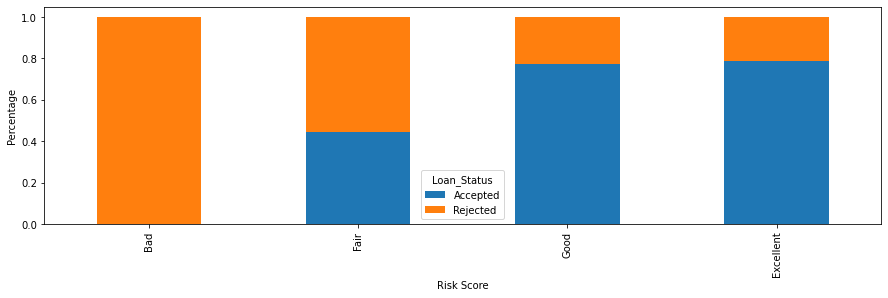

In [40]:
#plot risk scores
bins=[0,629,689,719,850]
group=['Bad','Fair','Good','Excellent']

clean_dti_data['Risk_Score_bins']=pd.cut(clean_dti_data['Risk_Score'],bins,labels=group)

Risk_Score_bins=pd.crosstab(clean_dti_data['Risk_Score_bins'],clean_dti_data['Loan_Status'])
Risk_Score_bins.div(Risk_Score_bins.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,4))
plt.xlabel('Risk Score')
plt.ylabel('Percentage')

In [41]:
#Turn the Loan Status into a binary variable to see correlation between that and numeric variable

clean_dti_data = clean_dti_data.drop(['Risk_Score_bins', 'Amount_Requested_bins'], axis=1)

In [42]:
#Use this table to work with
model_data = clean_dti_data.copy()
model_data

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
0,5000.0,669.0,21.80,OK,8,Other,Accepted
1,15000.0,704.0,18.29,FL,2,Debt consolidation,Accepted
2,11200.0,669.0,43.97,NH,0,Medical Expense,Accepted
3,25000.0,669.0,12.89,AL,10,Debt consolidation,Accepted
4,3000.0,764.0,0.58,WA,9,Major Purchase,Accepted
...,...,...,...,...,...,...,...
1081515,3000.0,535.0,1.54,CT,5,Medical expenses,Rejected
1081516,6000.0,580.0,5.55,TX,0,Car financing,Rejected
1081517,3000.0,561.0,0.00,OR,0,Debt consolidation,Rejected
1081518,2500.0,573.0,8.55,NY,0,Other,Rejected


In [43]:
columns_to_be_encoded=['Loan_Status', 'State', 'Purpose']
for column in columns_to_be_encoded:
    le=preprocessing.LabelEncoder()
    le.fit(list(model_data[column].values))
    model_data[column]=le.transform(list(model_data[column].values))
    with open(f'{column}.pickle', 'wb') as file:
        pickle.dump(le, file, pickle.HIGHEST_PROTOCOL)
model_data

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
0,5000.0,669.0,21.80,36,8,17,0
1,15000.0,704.0,18.29,9,2,4,0
2,11200.0,669.0,43.97,30,0,14,0
3,25000.0,669.0,12.89,1,10,4,0
4,3000.0,764.0,0.58,47,9,12,0
...,...,...,...,...,...,...,...
1081515,3000.0,535.0,1.54,6,5,15,1
1081516,6000.0,580.0,5.55,43,0,2,1
1081517,3000.0,561.0,0.00,37,0,4,1
1081518,2500.0,573.0,8.55,34,0,17,1


In [44]:
#Independent Variable
X=model_data.drop(['Loan_Status'], axis=1)
y=model_data['Loan_Status']



<AxesSubplot:>

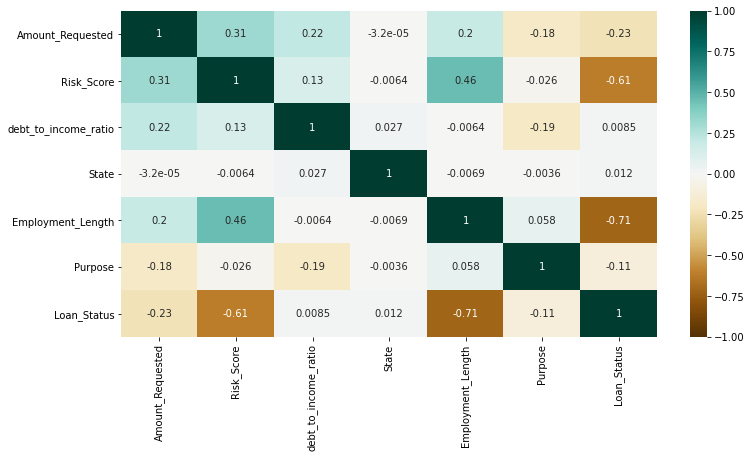

In [45]:
new_model_corr = model_data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(new_model_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [46]:
X

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose
0,5000.0,669.0,21.80,36,8,17
1,15000.0,704.0,18.29,9,2,4
2,11200.0,669.0,43.97,30,0,14
3,25000.0,669.0,12.89,1,10,4
4,3000.0,764.0,0.58,47,9,12
...,...,...,...,...,...,...
1081515,3000.0,535.0,1.54,6,5,15
1081516,6000.0,580.0,5.55,43,0,2
1081517,3000.0,561.0,0.00,37,0,4
1081518,2500.0,573.0,8.55,34,0,17


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)



In [48]:
#DecisionTreeClassifier

dtree= DecisionTreeClassifier (random_state=42)
dtree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [51]:
y_pred=dtree.predict(X_test)

In [52]:
#What is the perfect prediction
confusion_matrix(y_test, y_pred)

array([[145658,   3656],
       [  3561, 188423]], dtype=int64)

In [60]:
#Precision Score
print("Precision Score", average_precision_score(y_test, y_pred), "--What percentage of predictions were correct?")
print("Recall", recall_score(y_test, y_pred), "--What percentage of positive cases did you catch?")
print(cross_val_score(dtree, X_test, y_pred, cv=5, scoring = "accuracy"))
print(f1_score(y_test, y_pred))

Precision Score 0.9732044890796665 --What percentage of predictions were correct?
Recall 0.9814515792982749 --What percentage of positive cases did you catch?
[0.97505127 0.97713156 0.97427483 0.97885993 0.97765862]
0.9812088120959321


In [55]:
# #GradientBoostingRegressor
# X, y = make_regression(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# reg = GradientBoostingRegressor(random_state=42)
# reg.fit(X_train, y_train)
# GradientBoostingRegressor(random_state=42)
# reg.predict(X_test[1:2])
# reg.score(X_test, y_test)